In [ ]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils.vis_utils import plot_model
from keras.utils import to_categorical
from matplotlib import pyplot as plt

Загрузка, подготовка и преобразование в категории исходных данных

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


Создание модели

In [ ]:
network_rms = models.Sequential()
network_rms.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_rms.add(layers.Dense(256))
network_rms.add(layers.Dense(512))
network_rms.add(layers.Dense(10, activation='softmax'))

network_sgd = models.Sequential()
network_sgd.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_sgd.add(layers.Dense(256))
network_sgd.add(layers.Dense(512))
network_sgd.add(layers.Dense(10, activation='softmax'))

network_adam = models.Sequential()
network_adam.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_adam.add(layers.Dense(256))
network_adam.add(layers.Dense(512))
network_adam.add(layers.Dense(10, activation='softmax'))

#plot_model(network, show_shapes=True, show_layer_names=True)

Компиляция и обучение

In [ ]:
network_rms.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

network_sgd.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

network_adam.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


training = network_rms.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=2)
network_sgd.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=2)
network_adam.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=2)

Epoch 1/5
469/469 - 5s - loss: 0.0511 - accuracy: 0.9207
Epoch 2/5
469/469 - 5s - loss: 0.0195 - accuracy: 0.9748
Epoch 3/5
469/469 - 5s - loss: 0.0141 - accuracy: 0.9820
Epoch 4/5
469/469 - 5s - loss: 0.0111 - accuracy: 0.9875
Epoch 5/5
469/469 - 5s - loss: 0.0088 - accuracy: 0.9905
Epoch 1/5
469/469 - 4s - loss: 0.8245 - accuracy: 0.7955
Epoch 2/5
469/469 - 3s - loss: 0.3723 - accuracy: 0.8958
Epoch 3/5
469/469 - 3s - loss: 0.3094 - accuracy: 0.9119
Epoch 4/5
469/469 - 3s - loss: 0.2756 - accuracy: 0.9212
Epoch 5/5
469/469 - 3s - loss: 0.2503 - accuracy: 0.9291
Epoch 1/5
469/469 - 4s - loss: 0.0461 - accuracy: 0.9309
Epoch 2/5
469/469 - 4s - loss: 0.0174 - accuracy: 0.9769
Epoch 3/5
469/469 - 4s - loss: 0.0119 - accuracy: 0.9847
Epoch 4/5
469/469 - 4s - loss: 0.0094 - accuracy: 0.9892
Epoch 5/5
469/469 - 4s - loss: 0.0080 - accuracy: 0.9912


In [ ]:
history_dict = training.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

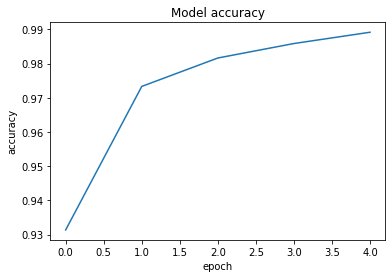

In [ ]:
plt.plot(history_dict['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

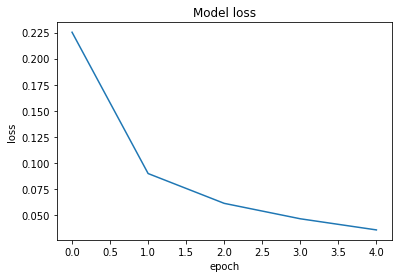

In [ ]:
plt.plot(history_dict['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_loss, test_acc = network_rms.evaluate(test_images, test_labels)
test_loss, test_acc = network_sgd.evaluate(test_images, test_labels)
test_loss, test_acc = network_adam.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0163 - accuracy: 0.9785


## **Лабораторная №7**

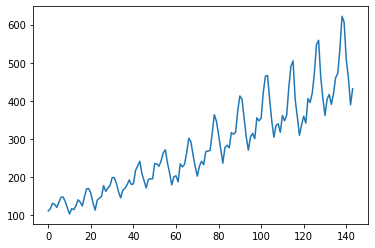

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataframe)
plt.show()

Нормализация данных

In [2]:
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Разделение датасета

In [3]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

Функция преобразования набора

In [4]:
def create_dataset(dataset, look_back = 1):
	dataX, dataY = [], []

	for i in range(len(dataset) - look_back - 1):
		tmp = dataset[i: (i + look_back), 0]

		dataX.append(tmp)
		dataY.append(dataset[i + look_back, 0])
  
	return numpy.array(dataX), numpy.array(dataY)

Разбиение и преобразование данных

In [25]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Построение сети

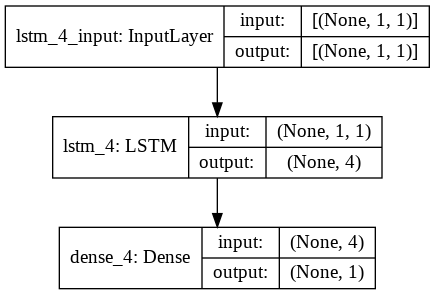

In [26]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

plot_model(model, show_shapes=True, show_layer_names=True)

Обучение сети

In [27]:
model.compile(loss='huber_loss', optimizer='rmsprop', metrics=['mae'])
ts_training = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.0236 - mae: 0.1698
Epoch 2/100
94/94 - 0s - loss: 0.0127 - mae: 0.1215
Epoch 3/100
94/94 - 0s - loss: 0.0095 - mae: 0.1102
Epoch 4/100
94/94 - 0s - loss: 0.0084 - mae: 0.1046
Epoch 5/100
94/94 - 0s - loss: 0.0080 - mae: 0.1038
Epoch 6/100
94/94 - 0s - loss: 0.0076 - mae: 0.1011
Epoch 7/100
94/94 - 0s - loss: 0.0072 - mae: 0.0988
Epoch 8/100
94/94 - 0s - loss: 0.0068 - mae: 0.0957
Epoch 9/100
94/94 - 0s - loss: 0.0064 - mae: 0.0932
Epoch 10/100
94/94 - 0s - loss: 0.0060 - mae: 0.0899
Epoch 11/100
94/94 - 0s - loss: 0.0055 - mae: 0.0862
Epoch 12/100
94/94 - 0s - loss: 0.0050 - mae: 0.0823
Epoch 13/100
94/94 - 0s - loss: 0.0045 - mae: 0.0774
Epoch 14/100
94/94 - 0s - loss: 0.0040 - mae: 0.0732
Epoch 15/100
94/94 - 0s - loss: 0.0035 - mae: 0.0670
Epoch 16/100
94/94 - 0s - loss: 0.0030 - mae: 0.0624
Epoch 17/100
94/94 - 0s - loss: 0.0025 - mae: 0.0563
Epoch 18/100
94/94 - 0s - loss: 0.0021 - mae: 0.0513
Epoch 19/100
94/94 - 0s - loss: 0.0017 - mae: 0.0468
Ep

Построение графика ошибок

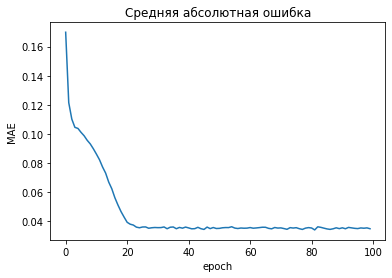

In [28]:
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [29]:
# Предсказание значений
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.27 RMSE
Test Score: 50.53 RMSE


Генерация предсказаний

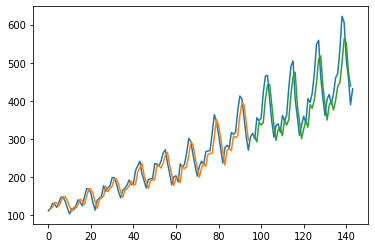

In [30]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()